In [1]:
import os
import pandas as pd
import numpy as np

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Visualization
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from matplotlib import rcParams
rcParams['figure.figsize'] = 18,4

pd.set_option('display.max_columns', 200)
pd.set_option('display.max_colwidth', 400)

sns.set(context='notebook', style='whitegrid', rc={"figure.figsize": (18,4)})

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
# setting random seed for notebook reproducability
rnd_seed=0
np.random.seed=rnd_seed
np.random.set_state=rnd_seed

## 1. Exploratory Data Analysis:

In [4]:
dataset = pd.read_csv('data/unprocessed_churn_data.csv', na_values=[""]) # Users who were 60 days enrolled, churn in the next 30

In [5]:
dataset.head(5) # Viewing the Data

,user,churn,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,cc_application_begin,app_downloaded,web_user,app_web_user,ios_user,android_user,registered_phones,payment_type,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
0,55409,0,37.0,na,NaN,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,Bi-Weekly,0,0,0,0,Leo,1,0,NaN,0.00,0
1,23547,0,28.0,R,486.0,0,0,1,0,0,96,0,0,5,1,1,1,1,0,0,Weekly,0,0,0,0,Leo,0,0,44.0,1.47,1
2,58313,0,35.0,R,561.0,47,2,86,47,0,285,0,0,9,1,0,0,0,1,2,Semi-Monthly,0,0,0,0,Capricorn,1,0,65.0,2.17,0
3,8095,0,26.0,R,567.0,26,3,38,25,0,74,0,0,26,1,0,0,0,1,0,Bi-Weekly,0,0,0,0,Capricorn,0,0,33.0,1.10,1
4,61353,1,27.0,na,NaN,0,0,2,0,0,0,0,0,0,1,1,1,0,1,0,Bi-Weekly,0,0,0,0,Aries,1,0,1.0,0.03,0


In [6]:
dataset.columns

Index(['user', 'churn', 'age', 'housing', 'credit_score', 'deposits',
       'withdrawal', 'purchases_partners', 'purchases', 'cc_taken',
       'cc_recommended', 'cc_disliked', 'cc_liked', 'cc_application_begin',
       'app_downloaded', 'web_user', 'app_web_user', 'ios_user',
       'android_user', 'registered_phones', 'payment_type', 'waiting_4_loan',
       'cancelled_loan', 'received_loan', 'rejected_loan', 'zodiac_sign',
       'left_for_two_month_plus', 'left_for_one_month', 'rewards_earned',
       'reward_rate', 'is_referred'],
      dtype='object')

In [7]:
dataset.describe() # Distribution of Numerical Variables

,user,churn,age,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,cc_application_begin,app_downloaded,web_user,app_web_user,ios_user,android_user,registered_phones,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
count,27000.000000,27000.000000,26996.000000,18969.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,23773.000000,27000.000000,27000.000000
mean,35422.702519,0.413852,32.219921,542.944225,3.341556,0.307000,28.062519,3.273481,0.073778,92.625778,0.050630,0.013111,8.197852,0.952481,0.606074,0.561741,0.393926,0.587259,0.420926,0.001296,0.018815,0.018185,0.004889,0.173444,0.018074,29.110125,0.907684,0.318037
std,20321.006678,0.492532,9.964838,61.059315,9.131406,1.055416,42.219686,8.953077,0.437299,88.869343,0.871366,0.238158,12.497243,0.212749,0.488628,0.496183,0.488628,0.492336,0.912831,0.035981,0.135873,0.133623,0.069751,0.378638,0.133222,21.973478,0.752016,0.465723
min,1.000000,0.000000,17.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,17810.500000,0.000000,25.000000,507.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.200000,0.000000
50%,35749.000000,0.000000,30.000000,542.000000,0.000000,0.000000,9.000000,0.000000,0.000000,65.000000,0.000000,0.000000,4.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,0.780000,0.000000
75%,53244.250000,1.000000,37.000000,578.000000,1.000000,0.000000,43.000000,1.000000,0.000000,164.000000,0.000000,0.000000,11.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,48.000000,1.530000,1.000000
max,69658.000000,1.000000,91.000000,838.000000,65.000000,29.000000,1067.000000,63.000000,29.000000,522.000000,65.000000,27.000000,263.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,114.000000,4.000000,1.000000


### 1.1 Cleaning Data:

#### 1.1.1 Removing NaN

In [8]:
dataset.isnull().any()

user                       False
churn                      False
age                         True
housing                    False
credit_score                True
deposits                   False
withdrawal                 False
purchases_partners         False
purchases                  False
cc_taken                   False
cc_recommended             False
cc_disliked                False
cc_liked                   False
cc_application_begin       False
app_downloaded             False
web_user                   False
app_web_user               False
ios_user                   False
android_user               False
registered_phones          False
payment_type               False
waiting_4_loan             False
cancelled_loan             False
received_loan              False
rejected_loan              False
zodiac_sign                False
left_for_two_month_plus    False
left_for_one_month         False
rewards_earned              True
reward_rate                False
is_referre

In [9]:
dataset.isnull().sum()

user                          0
churn                         0
age                           4
housing                       0
credit_score               8031
deposits                      0
withdrawal                    0
purchases_partners            0
purchases                     0
cc_taken                      0
cc_recommended                0
cc_disliked                   0
cc_liked                      0
cc_application_begin          0
app_downloaded                0
web_user                      0
app_web_user                  0
ios_user                      0
android_user                  0
registered_phones             0
payment_type                  0
waiting_4_loan                0
cancelled_loan                0
received_loan                 0
rejected_loan                 0
zodiac_sign                   0
left_for_two_month_plus       0
left_for_one_month            0
rewards_earned             3227
reward_rate                   0
is_referred                   0
dtype: i

In [10]:
dataset = dataset[pd.notnull(dataset['age'])]

In [11]:
dataset = dataset.drop(['credit_score', 'rewards_earned'], axis=1)

### 1.2 Histograms:

In [12]:
dataset2 = dataset.drop(['user', 'churn'], axis=1)

In [13]:
dataset2.columns

Index(['age', 'housing', 'deposits', 'withdrawal', 'purchases_partners',
       'purchases', 'cc_taken', 'cc_recommended', 'cc_disliked', 'cc_liked',
       'cc_application_begin', 'app_downloaded', 'web_user', 'app_web_user',
       'ios_user', 'android_user', 'registered_phones', 'payment_type',
       'waiting_4_loan', 'cancelled_loan', 'received_loan', 'rejected_loan',
       'zodiac_sign', 'left_for_two_month_plus', 'left_for_one_month',
       'reward_rate', 'is_referred'],
      dtype='object')

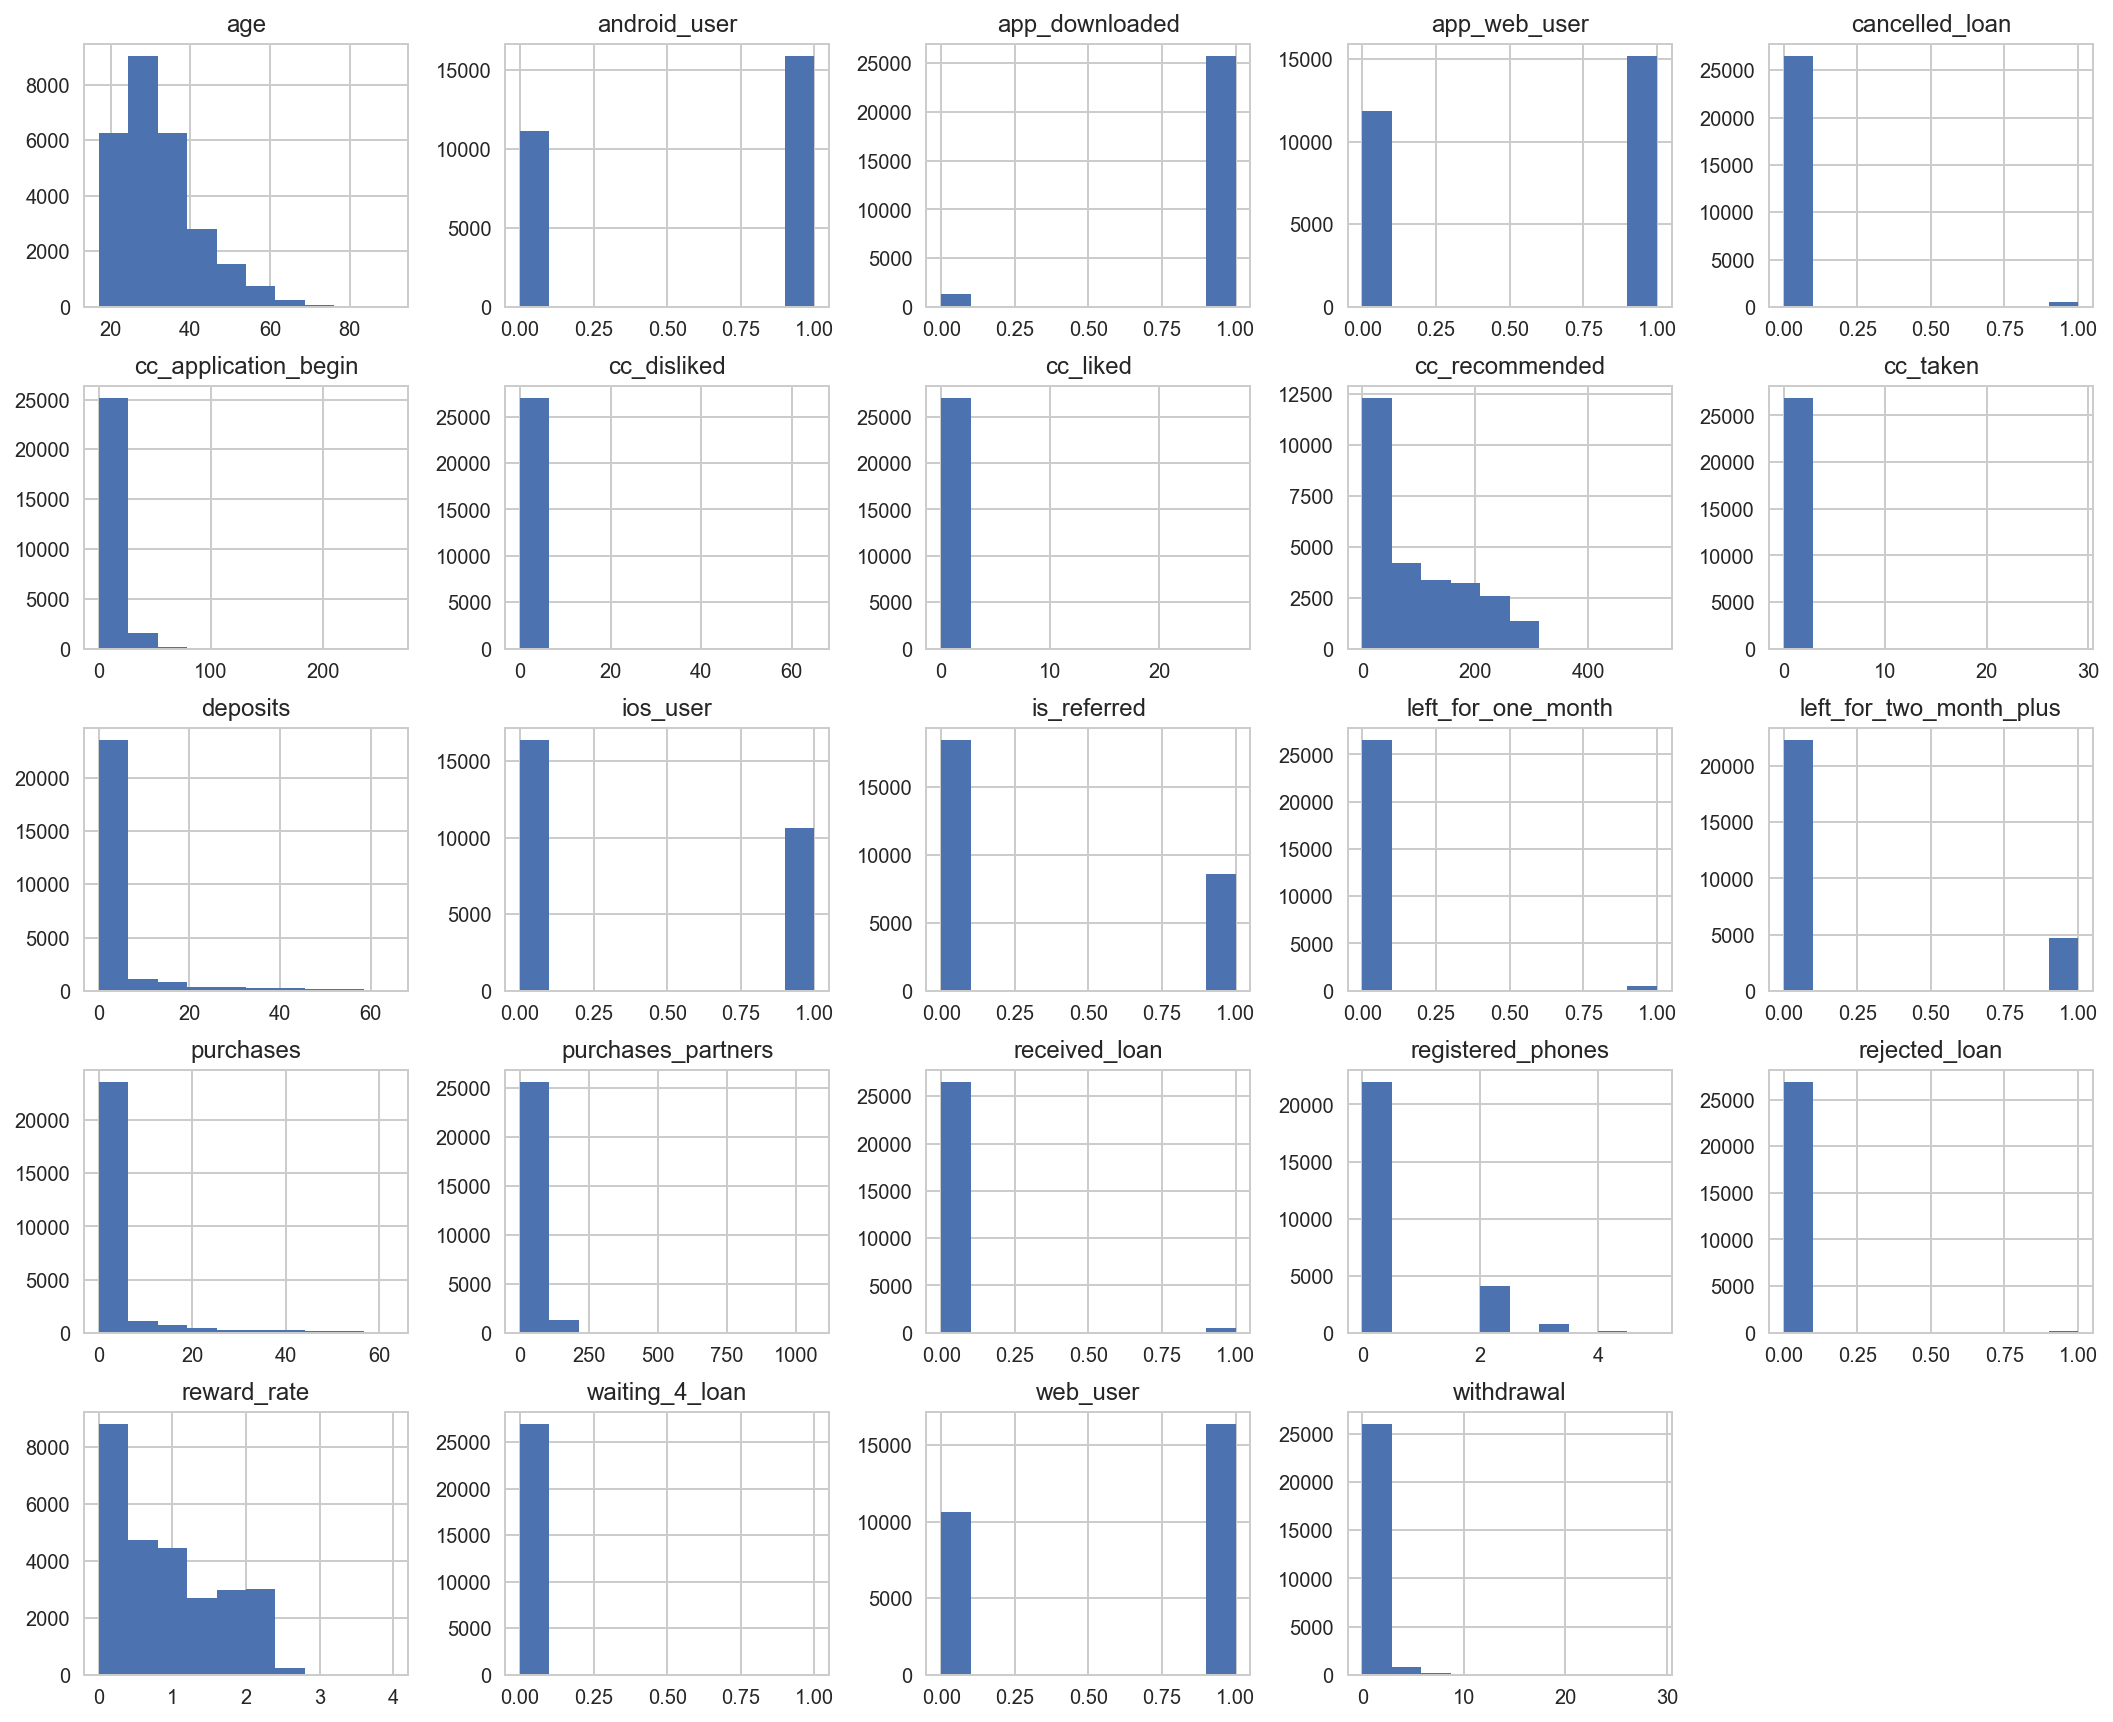

In [14]:
dataset2.hist(figsize=(18, 15));

### 1.3 Pie Charts:

In [15]:
## Pie Plots
dataset2 = dataset[['housing', 'is_referred', 'app_downloaded',
                    'web_user', 'app_web_user', 'ios_user',
                    'android_user', 'registered_phones', 'payment_type',
                    'waiting_4_loan', 'cancelled_loan',
                    'received_loan', 'rejected_loan', 'zodiac_sign',
                    'left_for_two_month_plus', 'left_for_one_month', 'is_referred']]

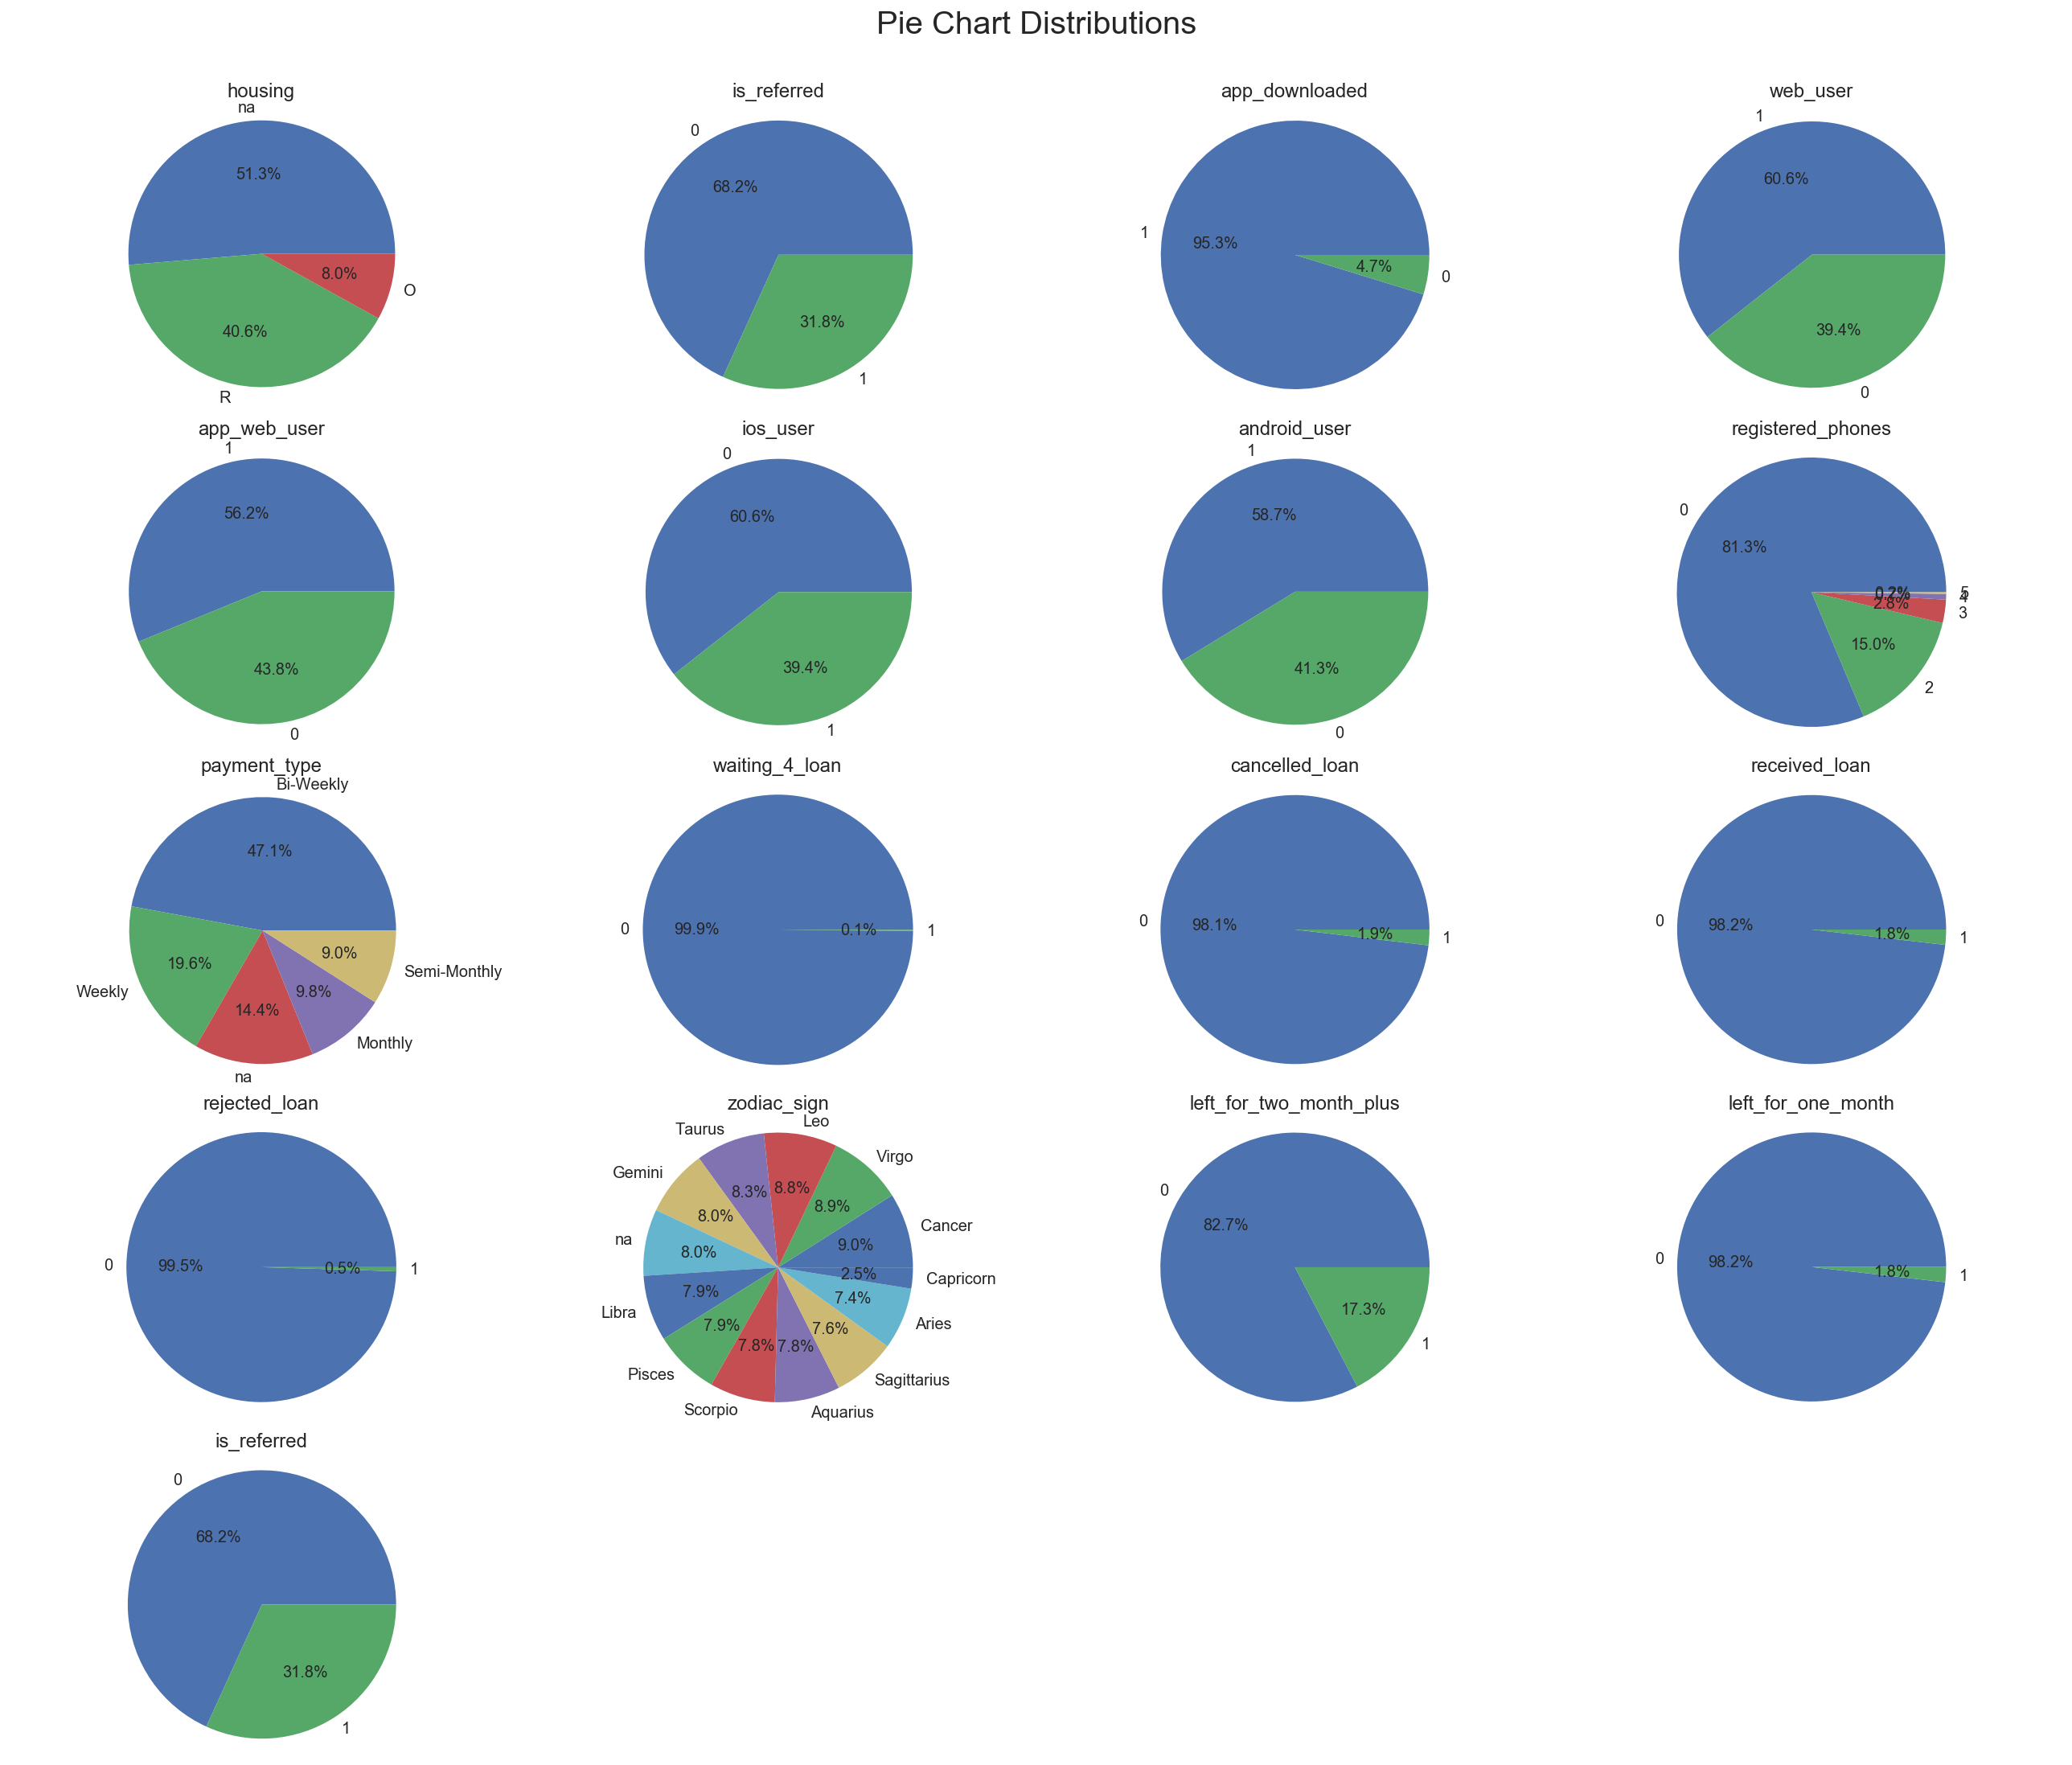

In [16]:
fig = plt.figure(figsize=(18, 16))
plt.suptitle('Pie Chart Distributions', fontsize=20)
for i in range(1, dataset2.shape[1] + 1):
    plt.subplot(5, 4, i)
    f = plt.gca()
    f.axes.get_yaxis().set_visible(False)
    f.set_title(dataset2.columns.values[i - 1])
   
    values = dataset2.iloc[:, i - 1].value_counts(normalize = True).values
    index = dataset2.iloc[:, i - 1].value_counts(normalize = True).index
    plt.pie(values, labels = index, autopct='%1.1f%%')
    plt.axis('equal')
fig.tight_layout(rect=[0, 0.03, 1, 0.95]);

### 1.4 Exploring Uneven Features:

In [17]:
dataset[dataset2.waiting_4_loan == 1].churn.value_counts()
dataset[dataset2.cancelled_loan == 1].churn.value_counts()
dataset[dataset2.received_loan == 1].churn.value_counts()
dataset[dataset2.rejected_loan == 1].churn.value_counts()
dataset[dataset2.left_for_one_month == 1].churn.value_counts()

0    27
1     8
Name: churn, dtype: int64

1    274
0    234
Name: churn, dtype: int64

1    292
0    199
Name: churn, dtype: int64

1    107
0     25
Name: churn, dtype: int64

1    266
0    222
Name: churn, dtype: int64

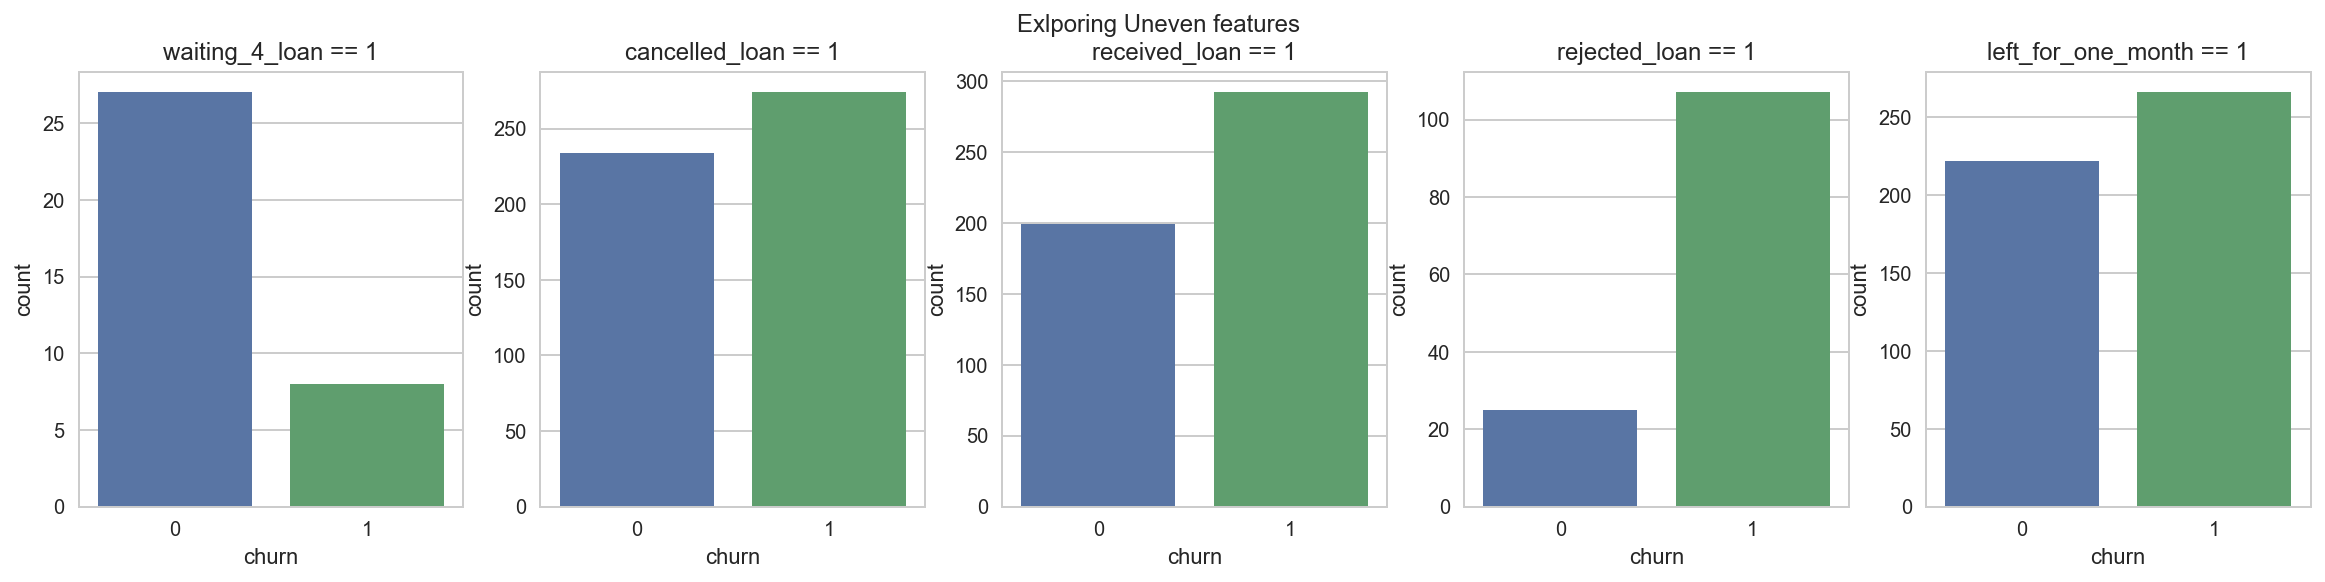

In [18]:
fig, axes = plt.subplots(1, 5, figsize=(20, 4))
fig.suptitle('Exlporing Uneven features')
sns.countplot(x='churn', data=dataset[dataset2.waiting_4_loan == 1], ax=axes[0])
axes[0].set_title('waiting_4_loan == 1')
sns.countplot(x='churn', data=dataset[dataset2.cancelled_loan == 1], ax=axes[1])
axes[1].set_title('cancelled_loan == 1')
sns.countplot(x='churn', data=dataset[dataset2.received_loan == 1], ax=axes[2])
axes[2].set_title('received_loan == 1')
sns.countplot(x='churn', data=dataset[dataset2.rejected_loan == 1], ax=axes[3])
axes[3].set_title('rejected_loan == 1')
sns.countplot(x='churn', data=dataset[dataset2.left_for_one_month == 1], ax=axes[4]);
axes[4].set_title('left_for_one_month == 1');

### 1.5 Correlation with Response Variable:

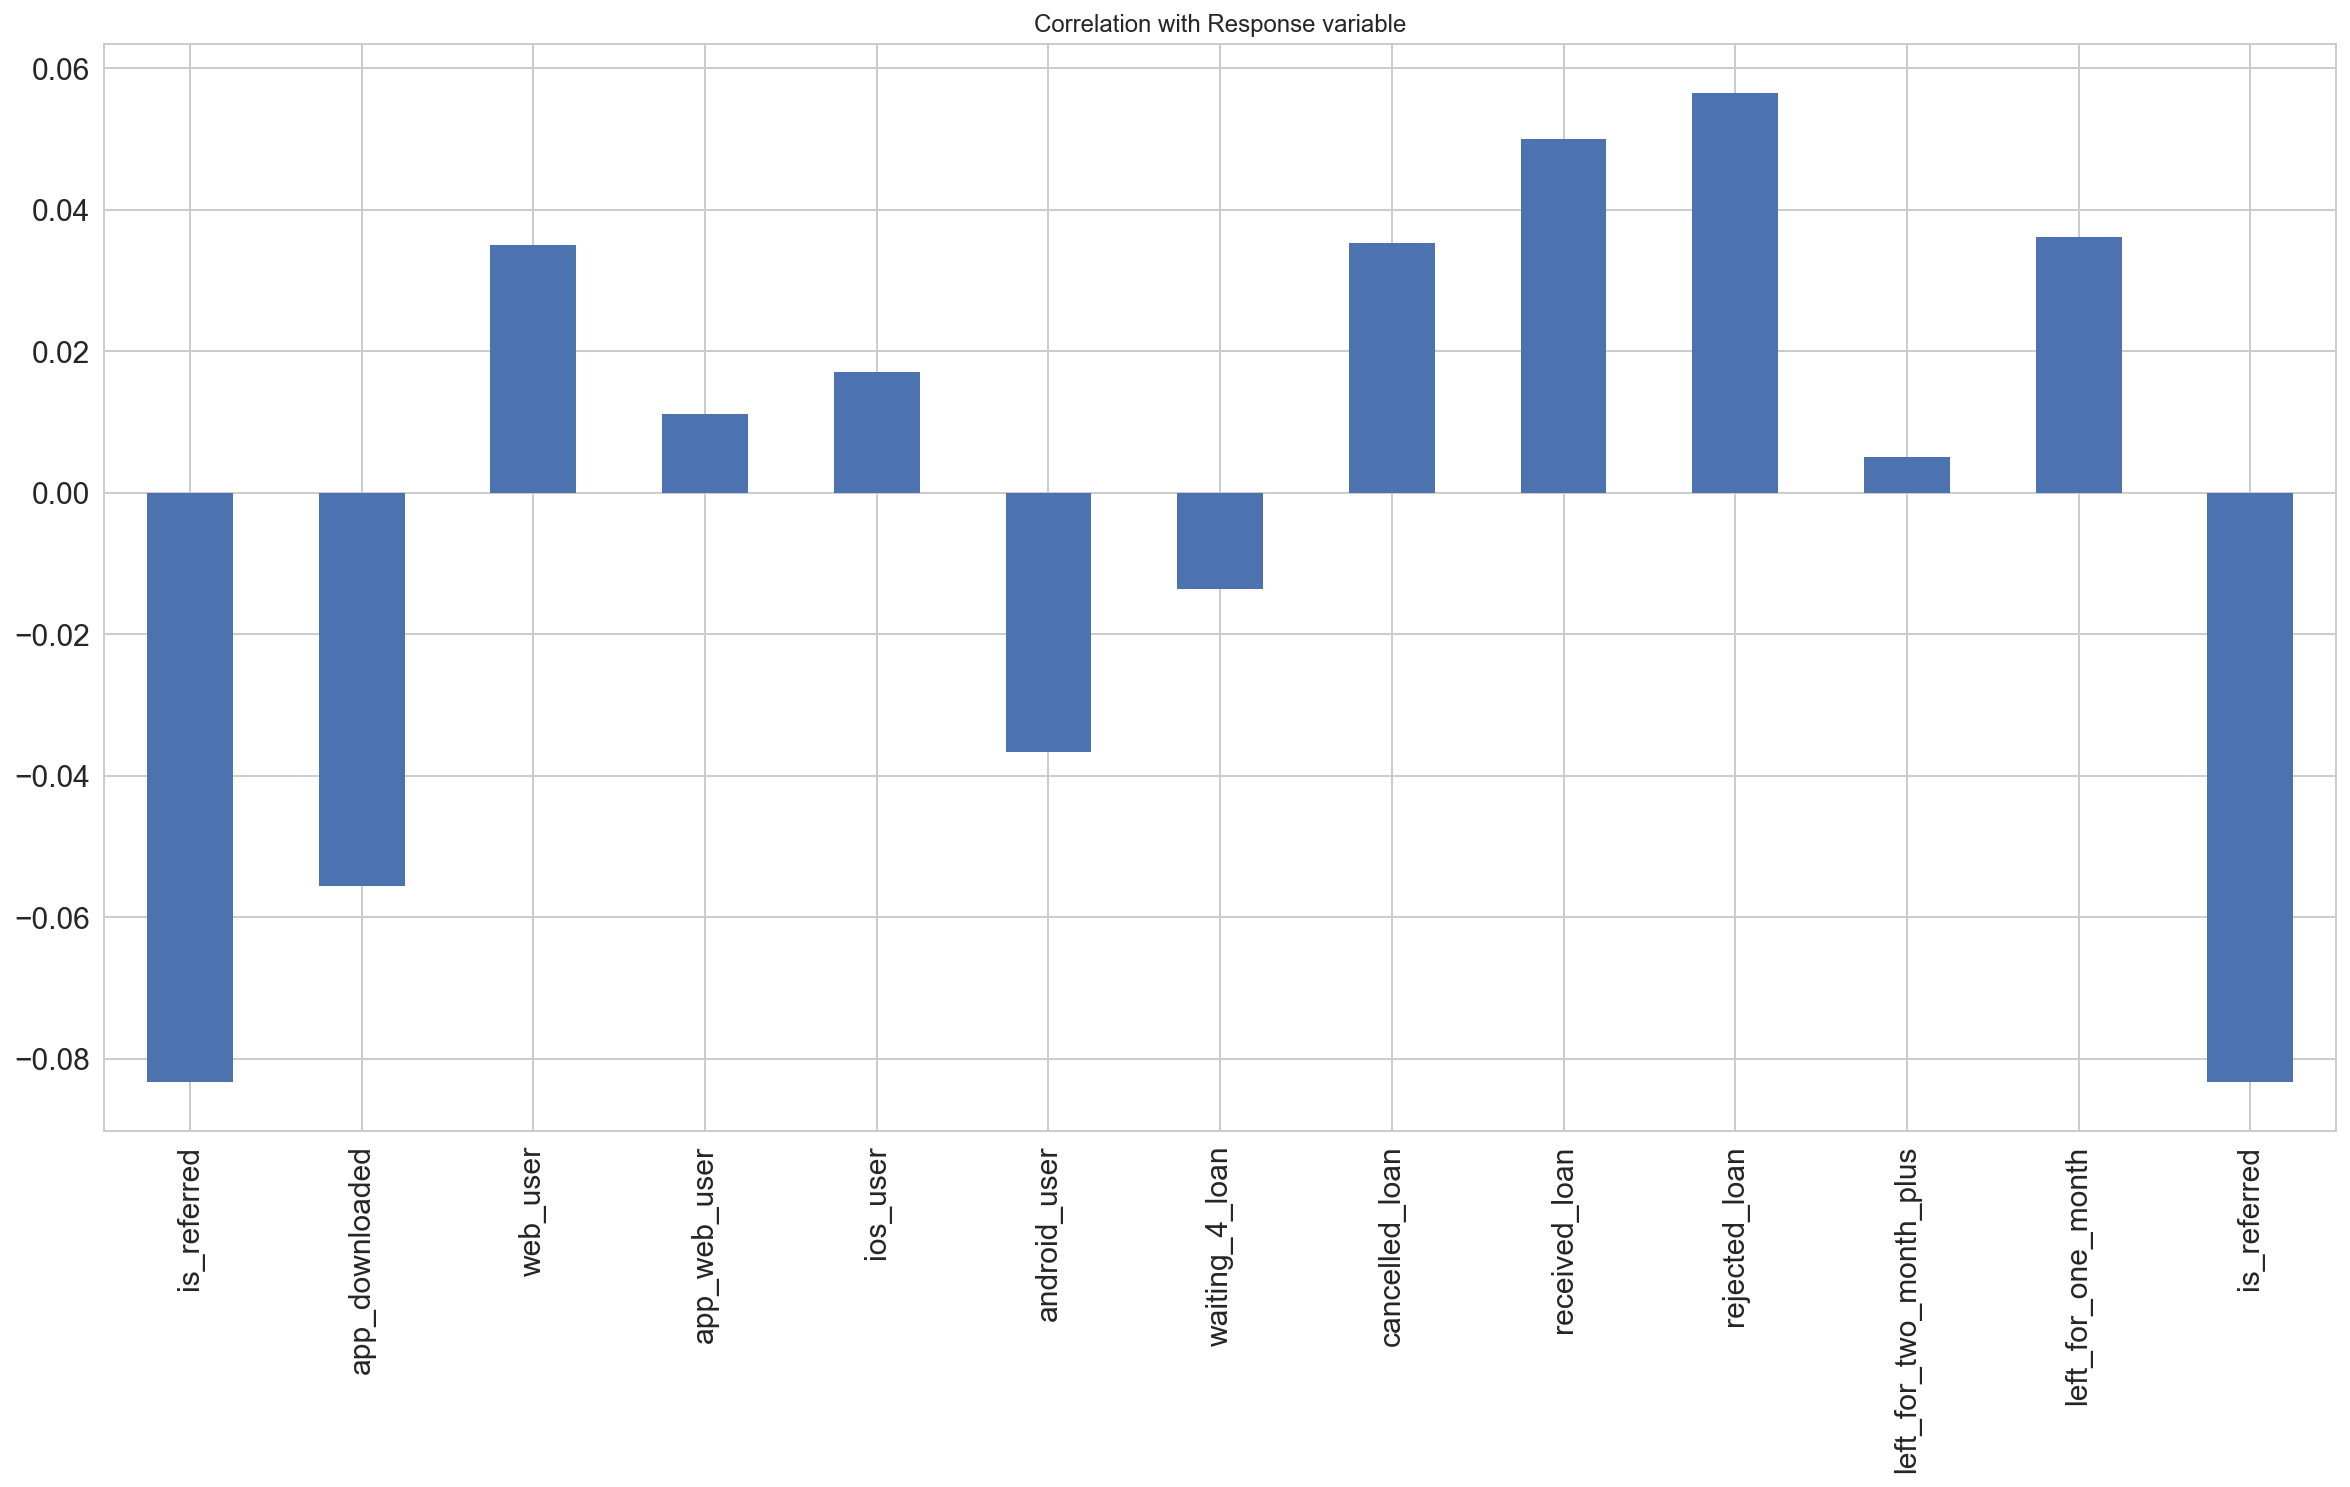

In [19]:
(dataset2.drop(['housing', 'payment_type', 'registered_phones', 'zodiac_sign'], axis=1)
        .corrwith(dataset.churn)
        .plot.bar(figsize=(20,10), title = 'Correlation with Response variable',  fontsize=15, rot=90, grid=True));

### 1.6 Heat Map:

In [20]:
# Compute the correlation matrix
corr = dataset.drop(['user', 'churn'], axis=1).corr()

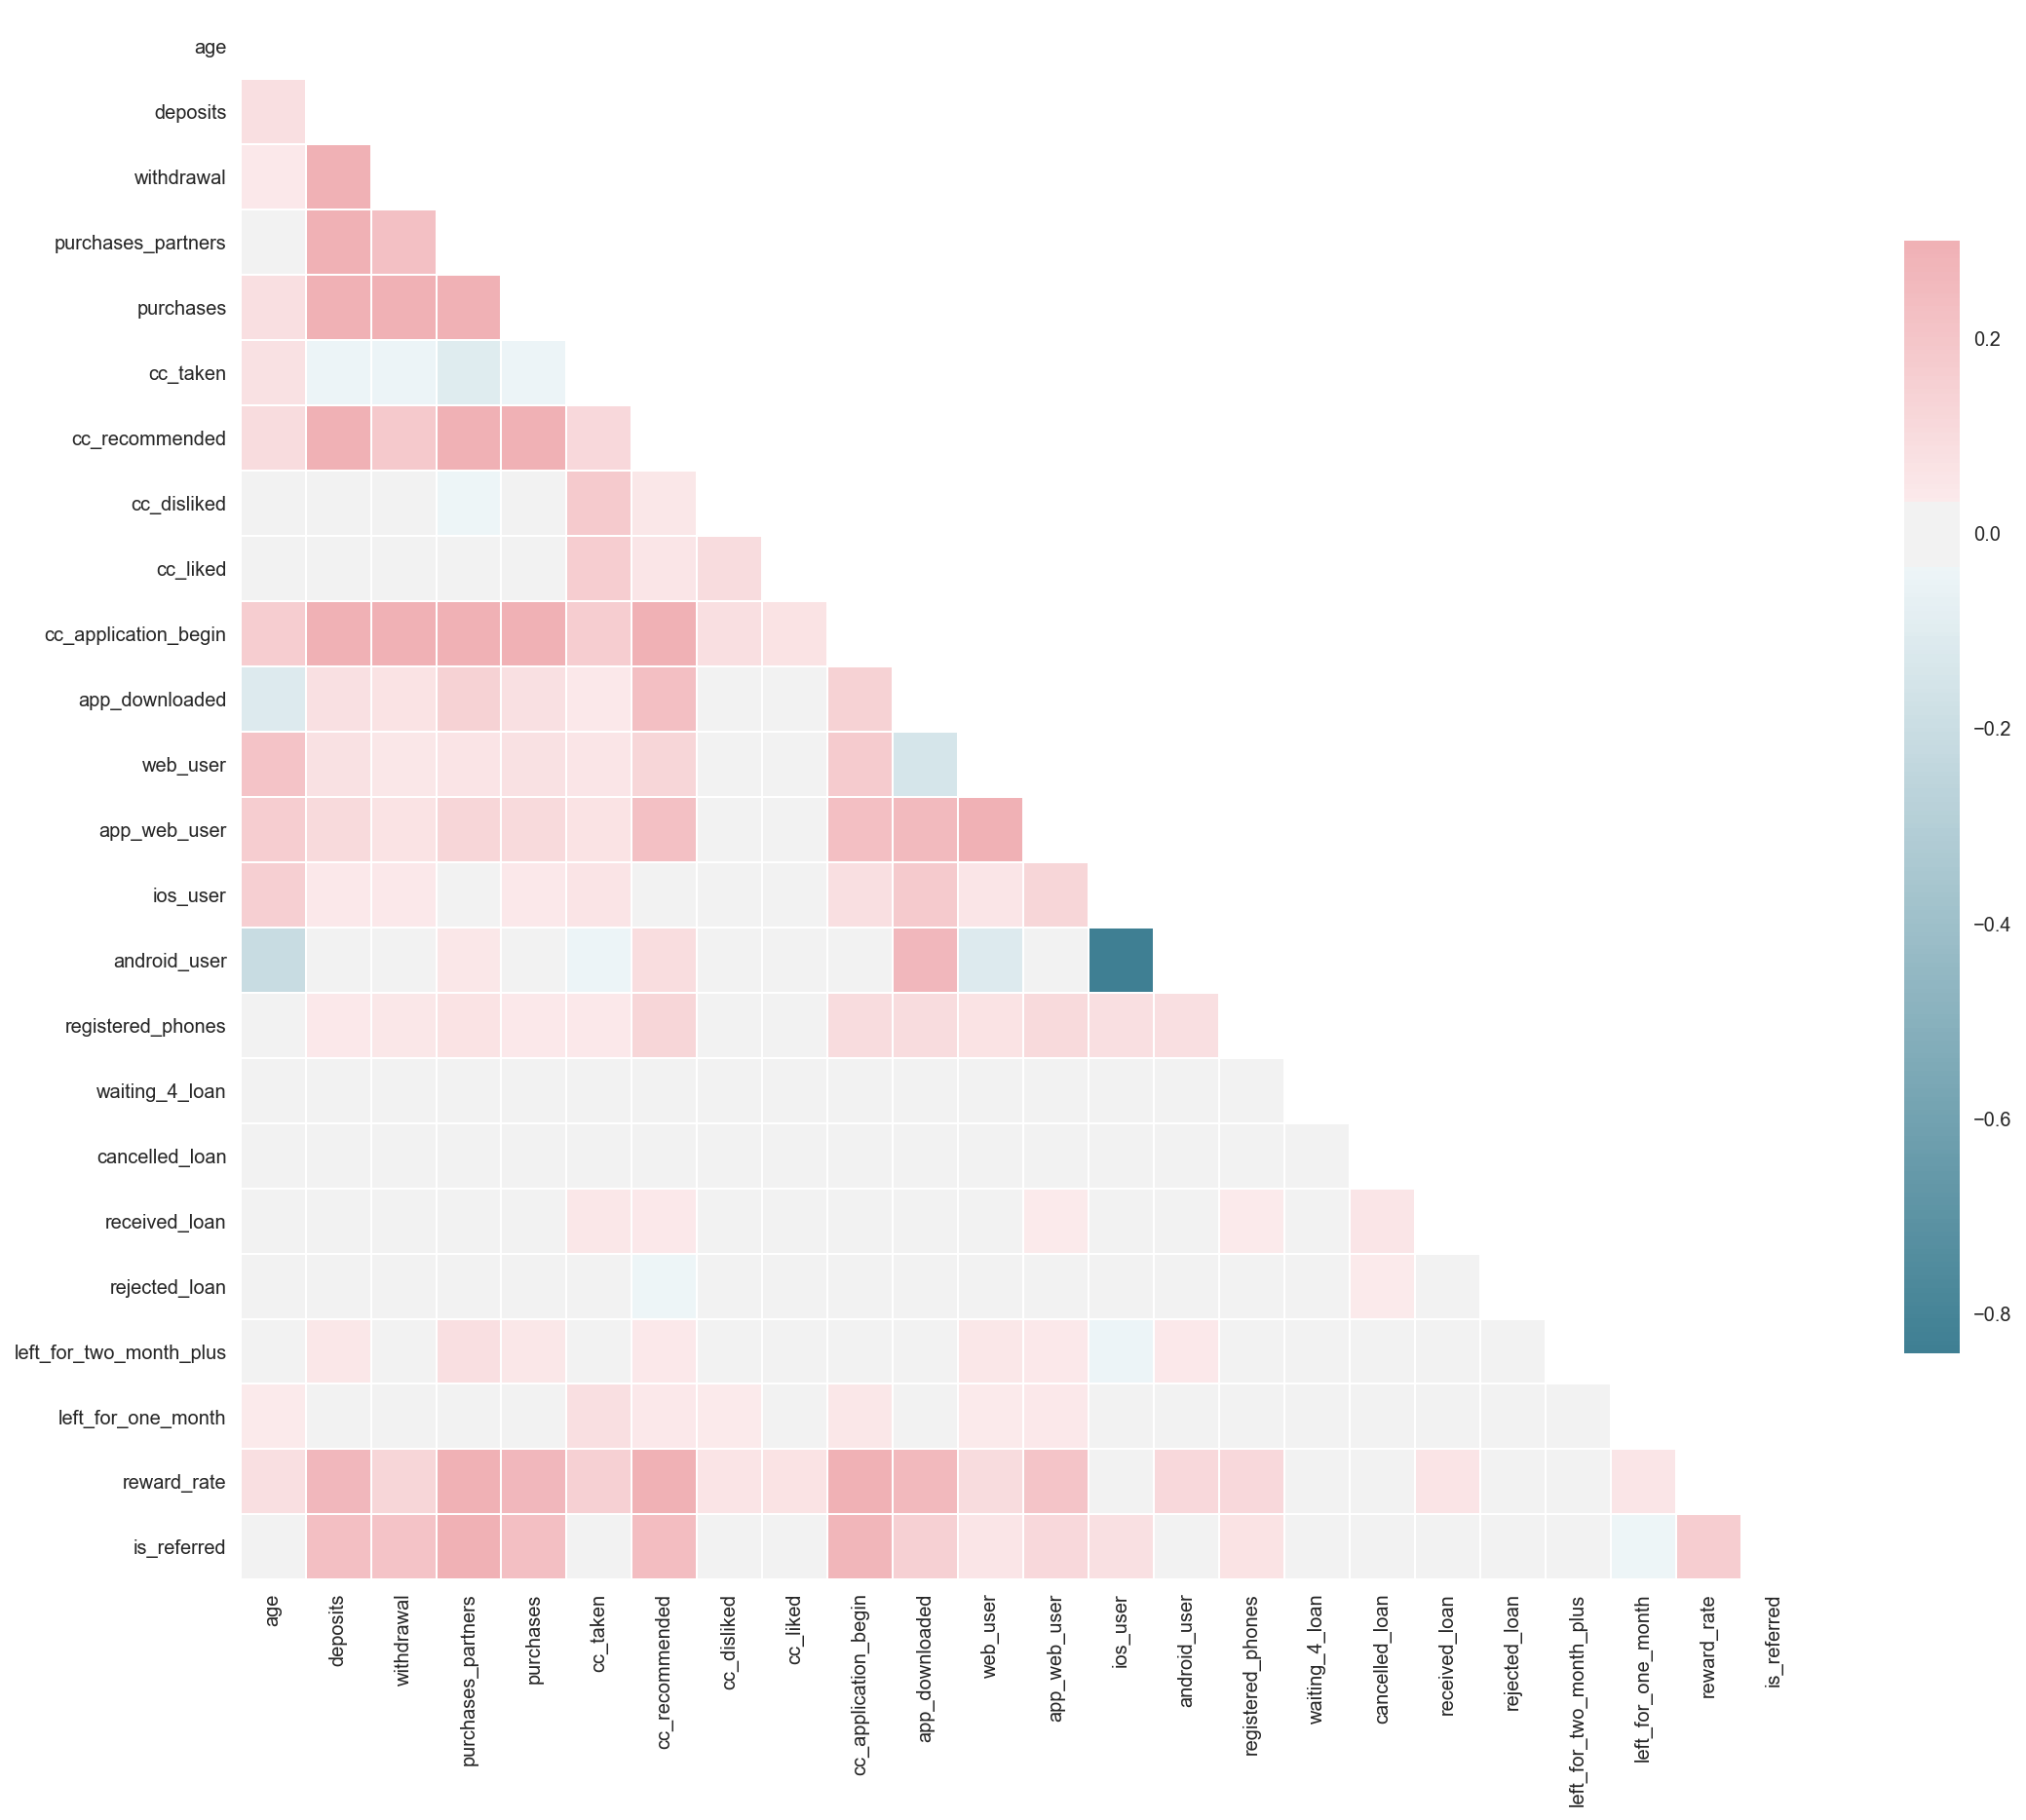

In [21]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .7});

### 1.7 Removing Correlated Fields:

In [22]:
dataset = dataset.drop(['app_web_user'], axis=1)

In [23]:
## Note: Although there are somewhat correlated fields, they are not colinear
## These feature are not functions of each other, so they won't break the model
## But these feature won't help much either. Feature Selection should remove them.
dataset.to_csv('data/processed_churn_data.csv', index = False)

## 2. Data Preparation:

In [24]:
dataset = pd.read_csv('data/processed_churn_data.csv')

In [25]:
user_identifier = dataset['user']
dataset = dataset.drop(['user'], axis=1)

### 2.1 One-Hot Encoding:

In [26]:
dataset.housing.value_counts()

na    13856
R     10969
O      2171
Name: housing, dtype: int64

In [27]:
dataset.groupby('housing')['churn'].nunique().reset_index()

,housing,churn
0,O,2
1,R,2
2,na,2


In [28]:
dataset = pd.get_dummies(dataset)

In [29]:
dataset.columns

Index(['churn', 'age', 'deposits', 'withdrawal', 'purchases_partners',
       'purchases', 'cc_taken', 'cc_recommended', 'cc_disliked', 'cc_liked',
       'cc_application_begin', 'app_downloaded', 'web_user', 'ios_user',
       'android_user', 'registered_phones', 'waiting_4_loan', 'cancelled_loan',
       'received_loan', 'rejected_loan', 'left_for_two_month_plus',
       'left_for_one_month', 'reward_rate', 'is_referred', 'housing_O',
       'housing_R', 'housing_na', 'payment_type_Bi-Weekly',
       'payment_type_Monthly', 'payment_type_Semi-Monthly',
       'payment_type_Weekly', 'payment_type_na', 'zodiac_sign_Aquarius',
       'zodiac_sign_Aries', 'zodiac_sign_Cancer', 'zodiac_sign_Capricorn',
       'zodiac_sign_Gemini', 'zodiac_sign_Leo', 'zodiac_sign_Libra',
       'zodiac_sign_Pisces', 'zodiac_sign_Sagittarius', 'zodiac_sign_Scorpio',
       'zodiac_sign_Taurus', 'zodiac_sign_Virgo', 'zodiac_sign_na'],
      dtype='object')

In [30]:
dataset = dataset.drop(['housing_na', 'zodiac_sign_na', 'payment_type_na'], axis=1)

### 2.2 Splitting the dataset into the Training set and Test set:

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset.drop(['churn'], axis=1), 
                                                    dataset['churn'],
                                                    test_size = 0.2,
                                                    random_state = rnd_seed)

### 2.3 Balancing the Training Set:

In [32]:
y_train.value_counts()

0    12656
1     8940
Name: churn, dtype: int64

In [33]:
pos_index = y_train[y_train.values == 1].index
neg_index = y_train[y_train.values == 0].index

In [34]:
if len(pos_index) > len(neg_index):
    higher = pos_index
    lower = neg_index
else:
    higher = neg_index
    lower = pos_index

In [35]:
higher = np.random.choice(higher, size=len(lower))
lower = np.asarray(lower)

In [36]:
new_indexes = np.concatenate((lower, higher))

In [37]:
X_train = X_train.loc[new_indexes,]
y_train = y_train[new_indexes]

### 2.3 Feature Scaling:

In [39]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
std_scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [40]:
X_train_std = pd.DataFrame(data=std_scaler.transform(X_train), columns=X_train.columns.values, index=X_train.index.values)
X_test_std = pd.DataFrame(data=std_scaler.transform(X_test), columns=X_test.columns.values, index=X_test.index.values)

In [41]:
X_train_std.head(5)

,age,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,cc_application_begin,app_downloaded,web_user,ios_user,android_user,registered_phones,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month,reward_rate,is_referred,housing_O,housing_R,payment_type_Bi-Weekly,payment_type_Monthly,payment_type_Semi-Monthly,payment_type_Weekly,zodiac_sign_Aquarius,zodiac_sign_Aries,zodiac_sign_Cancer,zodiac_sign_Capricorn,zodiac_sign_Gemini,zodiac_sign_Leo,zodiac_sign_Libra,zodiac_sign_Pisces,zodiac_sign_Sagittarius,zodiac_sign_Scorpio,zodiac_sign_Taurus,zodiac_sign_Virgo
11695,-0.624786,-0.353340,-0.281844,-0.578248,-0.353080,-0.169878,-0.904196,-0.058417,-0.073229,-0.563763,0.232639,-1.244372,-0.812981,0.852860,-0.466377,-0.041675,-0.147753,-0.13818,-0.070729,-0.446943,-0.140681,-0.511090,-0.674858,-0.291012,1.213966,-0.939099,-0.332504,-0.312312,2.024085,3.447005,-0.288404,-0.305686,-0.159207,-0.29752,-0.309173,-0.291803,-0.293155,-0.289313,-0.295735,-0.300627,-0.313712
19766,-0.422862,-0.353340,-0.281844,-0.626280,-0.353080,-0.169878,0.328708,0.996621,-0.073229,-0.563763,0.232639,0.803618,-0.812981,0.852860,-0.466377,-0.041675,-0.147753,-0.13818,-0.070729,-0.446943,-0.140681,0.955061,-0.674858,-0.291012,-0.823746,1.064850,-0.332504,-0.312312,-0.494050,-0.290107,-0.288404,-0.305686,-0.159207,-0.29752,-0.309173,3.426969,-0.293155,-0.289313,-0.295735,-0.300627,-0.313712
8354,0.283875,-0.353340,-0.281844,-0.626280,-0.353080,-0.169878,2.018243,-0.058417,-0.073229,-0.239141,0.232639,0.803618,-0.812981,0.852860,-0.466377,-0.041675,-0.147753,-0.13818,-0.070729,-0.446943,-0.140681,1.394906,-0.674858,-0.291012,-0.823746,-0.939099,-0.332504,-0.312312,-0.494050,-0.290107,-0.288404,-0.305686,-0.159207,-0.29752,-0.309173,-0.291803,-0.293155,-0.289313,-0.295735,-0.300627,3.187640
17883,0.586762,-0.353340,-0.281844,0.046172,-0.353080,-0.169878,-0.173586,-0.058417,-0.073229,0.004326,0.232639,0.803618,1.230041,-1.172526,-0.466377,-0.041675,-0.147753,-0.13818,-0.070729,-0.446943,-0.140681,-0.644377,1.481793,-0.291012,1.213966,-0.939099,-0.332504,-0.312312,2.024085,-0.290107,-0.288404,-0.305686,-0.159207,-0.29752,-0.309173,-0.291803,-0.293155,-0.289313,-0.295735,3.326376,-0.313712
25149,-0.826711,-0.239495,-0.281844,-0.097925,-0.236851,-0.169878,-0.573138,-0.058417,-0.073229,-0.239141,0.232639,-1.244372,1.230041,-1.172526,-0.466377,-0.041675,-0.147753,-0.13818,-0.070729,-0.446943,-0.140681,-0.551076,1.481793,-0.291012,1.213966,-0.939099,-0.332504,-0.312312,2.024085,-0.290107,-0.288404,-0.305686,-0.159207,-0.29752,-0.309173,-0.291803,3.411164,-0.289313,-0.295735,-0.300627,-0.313712


In [42]:
X_test_std.head(5)

,age,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,cc_application_begin,app_downloaded,web_user,ios_user,android_user,registered_phones,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month,reward_rate,is_referred,housing_O,housing_R,payment_type_Bi-Weekly,payment_type_Monthly,payment_type_Semi-Monthly,payment_type_Weekly,zodiac_sign_Aquarius,zodiac_sign_Aries,zodiac_sign_Cancer,zodiac_sign_Capricorn,zodiac_sign_Gemini,zodiac_sign_Leo,zodiac_sign_Libra,zodiac_sign_Pisces,zodiac_sign_Sagittarius,zodiac_sign_Scorpio,zodiac_sign_Taurus,zodiac_sign_Virgo
2834,-0.019012,0.898956,-0.281844,-0.602264,0.925434,2.048830,1.253386,-0.058417,-0.073229,1.870902,0.232639,-1.244372,-0.812981,0.852860,-0.466377,-0.041675,-0.147753,-0.13818,-0.070729,-0.446943,-0.140681,0.955061,-0.674858,-0.291012,-0.823746,-0.939099,-0.332504,-0.312312,2.024085,-0.290107,-0.288404,-0.305686,-0.159207,-0.297520,-0.309173,-0.291803,-0.293155,3.456463,-0.295735,-0.300627,-0.313712
21018,-0.725749,-0.353340,-0.281844,2.447786,-0.353080,-0.169878,1.721433,-0.058417,-0.073229,-0.401452,0.232639,0.803618,-0.812981,0.852860,-0.466377,-0.041675,-0.147753,-0.13818,14.138560,-0.446943,-0.140681,1.088348,-0.674858,-0.291012,1.213966,1.064850,-0.332504,-0.312312,-0.494050,-0.290107,-0.288404,-0.305686,-0.159207,3.361118,-0.309173,-0.291803,-0.293155,-0.289313,-0.295735,-0.300627,-0.313712
5590,1.495423,0.898956,1.608038,-0.626280,0.925434,-0.169878,0.442866,2.051659,-0.073229,2.195524,0.232639,-1.244372,-0.812981,0.852860,-0.466377,-0.041675,-0.147753,-0.13818,-0.070729,-0.446943,-0.140681,0.955061,1.481793,-0.291012,1.213966,1.064850,-0.332504,-0.312312,-0.494050,-0.290107,-0.288404,-0.305686,-0.159207,-0.297520,-0.309173,-0.291803,-0.293155,-0.289313,-0.295735,3.326376,-0.313712
15769,0.081950,-0.353340,-0.281844,-0.434151,-0.353080,-0.169878,-0.995522,-0.058417,-0.073229,-0.563763,0.232639,-1.244372,1.230041,-1.172526,1.697303,-0.041675,-0.147753,-0.13818,-0.070729,-0.446943,-0.140681,-0.511090,1.481793,-0.291012,-0.823746,-0.939099,-0.332504,-0.312312,2.024085,-0.290107,-0.288404,-0.305686,6.281122,-0.297520,-0.309173,-0.291803,-0.293155,-0.289313,-0.295735,-0.300627,-0.313712
15120,-1.028636,0.329731,-0.281844,3.144254,0.344291,-0.169878,1.755680,-0.058417,-0.073229,2.114368,0.232639,0.803618,1.230041,-1.172526,-0.466377,-0.041675,-0.147753,-0.13818,-0.070729,2.237420,-0.140681,1.354921,1.481793,-0.291012,1.213966,1.064850,-0.332504,-0.312312,-0.494050,-0.290107,-0.288404,-0.305686,-0.159207,-0.297520,3.234430,-0.291803,-0.293155,-0.289313,-0.295735,-0.300627,-0.313712


## 3. Model Building:

### 3.1 Fitting Model to the Training Set:

In [43]:
# Fitting Model to the Training Set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = rnd_seed)
classifier.fit(X_train_std, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### 3.2 Predicting Test Set:

In [44]:
# Predicting Test Set
y_pred = classifier.predict(X_test_std)

### 3.3 Evaluating Results:

In [45]:
# Evaluating Results
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
cm = confusion_matrix(y_test, y_pred)

In [46]:
accuracy_score(y_test, y_pred)

0.61796296296296294

In [47]:
precision_score(y_test, y_pred) # tp / (tp + fp)

0.52755398001933618

In [48]:
recall_score(y_test, y_pred) # tp / (tp + fn)

0.73276633840644578

In [49]:
f1_score(y_test, y_pred)

0.61345325089001324

In [50]:
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))

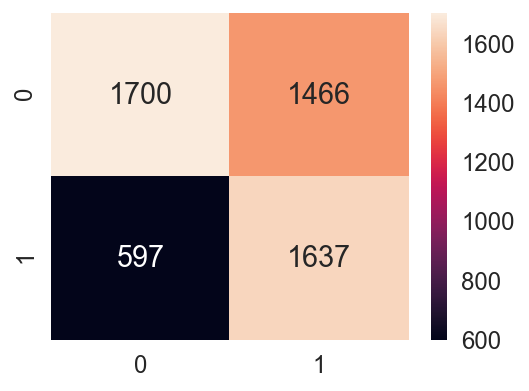

In [51]:
plt.figure(figsize = (4,3))
sns.set(font_scale=1.2)
sns.heatmap(df_cm, annot=True, fmt='g');

In [52]:
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

Test Data Accuracy: 0.6180


### 3.4 Applying k-Fold Cross Validation:

In [53]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train_std, y = y_train, cv = 10)

In [54]:
print("LogReg Accuracy: %0.3f (+/- %0.3f)" % (accuracies.mean(), accuracies.std() * 2))

LogReg Accuracy: 0.644 (+/- 0.028)


### 3.5 Analyzing Coefficients:

In [55]:
# Analyzing Coefficients
pd.concat([pd.DataFrame(X_train_std.columns, columns = ["features"]),
           pd.DataFrame(np.transpose(classifier.coef_), columns = ["coef"])
           ],axis = 1)

,features,coef
0,age,-0.170178
1,deposits,0.128862
2,withdrawal,0.052104
3,purchases_partners,-0.719337
4,purchases,-0.260050
5,cc_taken,0.104120
6,cc_recommended,0.091502
7,cc_disliked,-0.024355
8,cc_liked,-0.000770
9,cc_application_begin,0.025202


### 3.6 Feature Selection:

In [56]:
## Feature Selection
# Recursive Feature Elimination
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Model to Test
classifier = LogisticRegression()

# Select Best X Features
rfe = RFE(classifier, 20)
rfe = rfe.fit(X_train_std, y_train)

In [57]:
# summarize the selection of the attributes
print(rfe.support_)

[ True  True  True  True  True  True  True False False False False  True
  True  True  True  True  True  True  True  True  True  True False  True
 False False False False  True False False False False False False False
 False False False False False]


In [58]:
# summarize the ranking of the attributes. all top 20 are given rank 1
print(rfe.ranking_)

[ 1  1  1  1  1  1  1  7 21  6  9  1  1  1  1  1  1  1  1  1  1  1 18  1 10
 11 16 12  1 13 19  2  5  8 20 17  3 22 15 14  4]


In [59]:
X_train_std.columns[rfe.support_]

Index(['age', 'deposits', 'withdrawal', 'purchases_partners', 'purchases',
       'cc_taken', 'cc_recommended', 'web_user', 'ios_user', 'android_user',
       'registered_phones', 'waiting_4_loan', 'cancelled_loan',
       'received_loan', 'rejected_loan', 'left_for_two_month_plus',
       'left_for_one_month', 'reward_rate', 'housing_O',
       'payment_type_Weekly'],
      dtype='object')

In [60]:
# Compute the correlation matrix
corr = X_train_std[X_train_std.columns[rfe.support_]].corr()

In [61]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

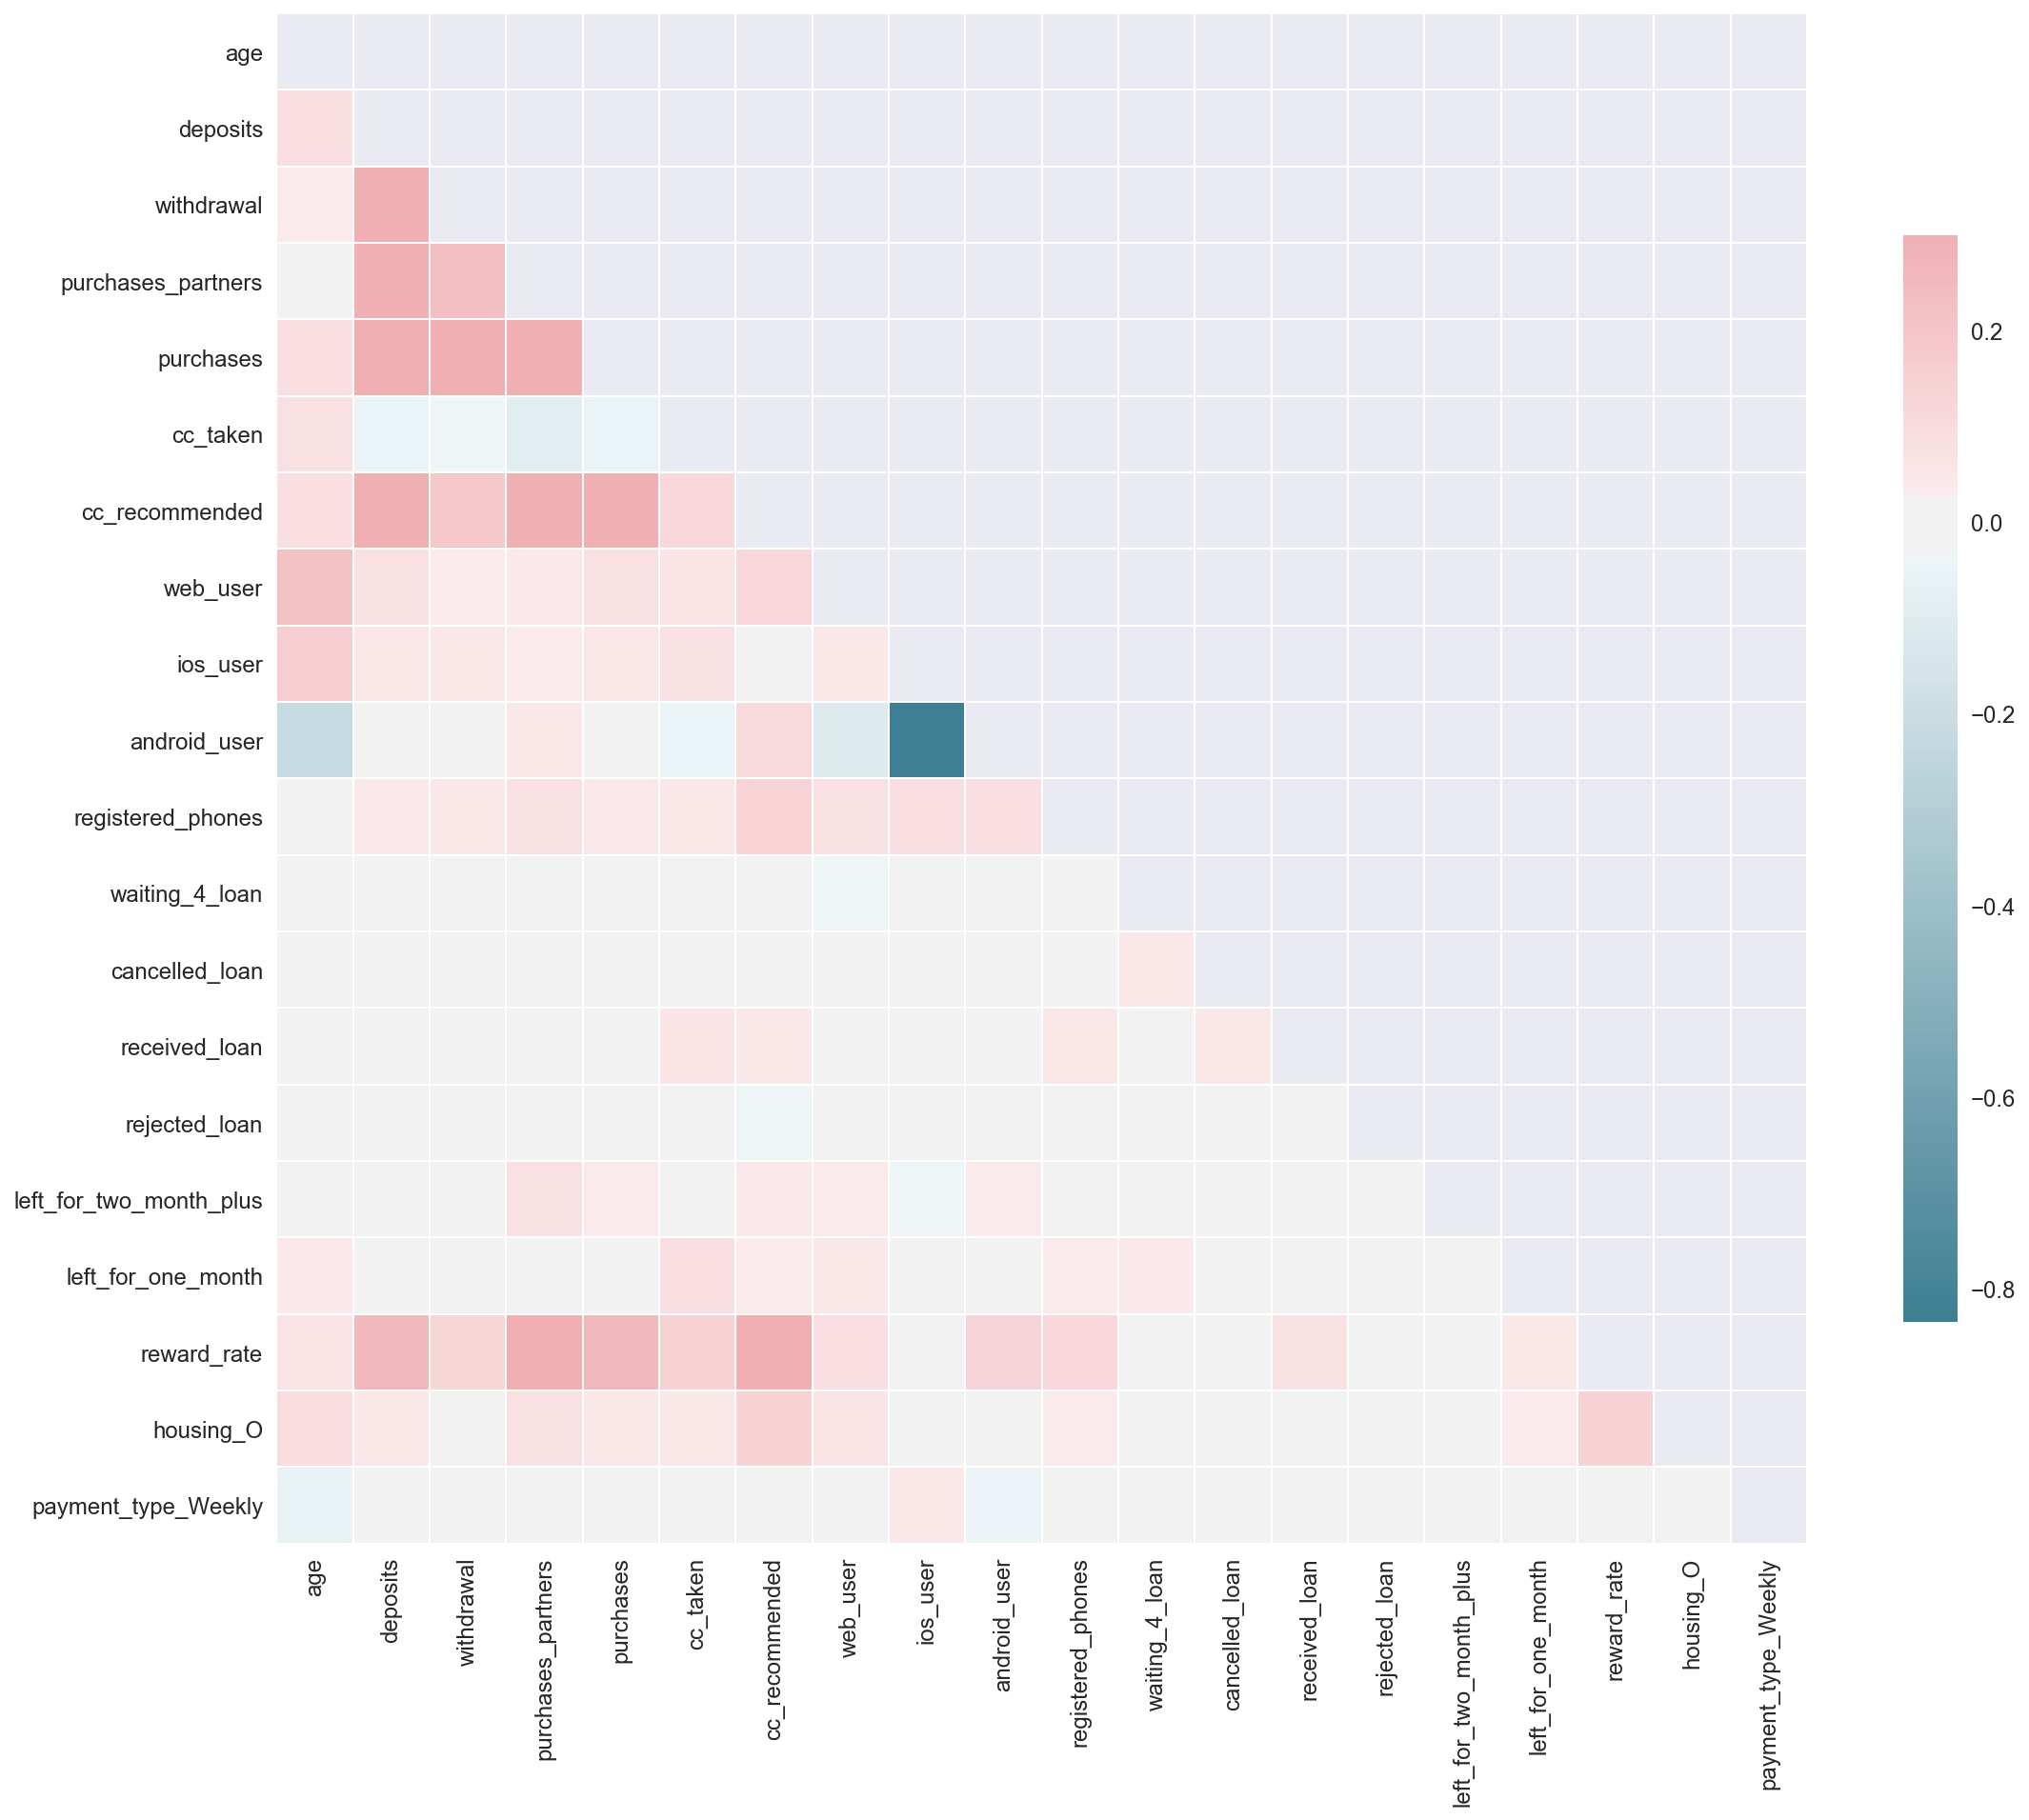

In [62]:
# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(18, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .7});

### 3.7 Fitting Model to the Training Set on Selected Features:

In [63]:
# Fitting Model to the Training Set on Selected Features
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train_std[X_train_std.columns[rfe.support_]], y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### 3.8 Predicting Test Set:

In [64]:
# Predicting Test Set
y_pred = classifier.predict(X_test_std[X_train_std.columns[rfe.support_]])

In [65]:
# Evaluating Results
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
cm = confusion_matrix(y_test, y_pred)

In [66]:
accuracy_score(y_test, y_pred)

0.61277777777777775

In [67]:
precision_score(y_test, y_pred) # tp / (tp + fp)

0.52274896595609288

In [68]:
recall_score(y_test, y_pred) # tp / (tp + fn)

0.73545210384959714

In [69]:
f1_score(y_test, y_pred)

0.61112144318393158

In [70]:
df_cm = pd.DataFrame(cm, index = (1, 0), columns = (1, 0))

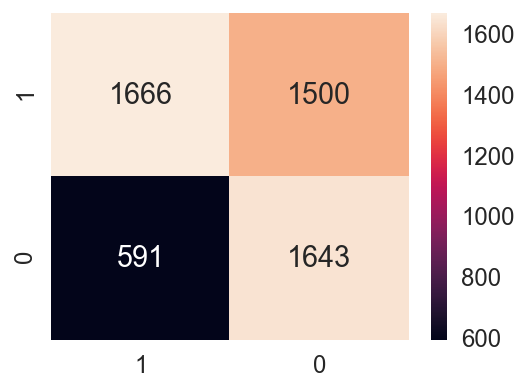

In [71]:
plt.figure(figsize = (4,3))
sns.set(font_scale=1.2)
sns.heatmap(df_cm, annot=True, fmt='g');

In [72]:
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

Test Data Accuracy: 0.6128


### 3.9 Applying k-Fold Cross Validation:

In [73]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier,
                             X = X_train_std[X_train_std.columns[rfe.support_]],
                             y = y_train, cv = 10)

In [74]:
print("LogReg Accuracy: %0.3f (+/- %0.3f)" % (accuracies.mean(), accuracies.std() * 2))

LogReg Accuracy: 0.642 (+/- 0.026)


In [75]:
# Analyzing Coefficients
pd.concat([pd.DataFrame(X_train_std[X_train_std.columns[rfe.support_]].columns, columns = ["features"]),
           pd.DataFrame(np.transpose(classifier.coef_), columns = ["coef"])
           ],axis = 1)

,features,coef
0,age,-0.166824
1,deposits,0.138906
2,withdrawal,0.055244
3,purchases_partners,-0.712537
4,purchases,-0.262818
5,cc_taken,0.103968
6,cc_recommended,0.111180
7,web_user,0.144778
8,ios_user,0.124988
9,android_user,0.060818


## 4. Model Conclusion:

In [76]:
# Formatting Final Results
final_results = pd.concat([y_test, user_identifier], axis = 1).dropna()
final_results['predicted_churn'] = y_pred
final_results = final_results[['user', 'churn', 'predicted_churn']].reset_index(drop=True)

In [77]:
final_results.head(5)

,user,churn,predicted_churn
0,61353,1.0,1
1,67679,0.0,1
2,21269,0.0,0
3,69531,0.0,1
4,25997,0.0,0
